In [1]:
'''
Write a code to denoise an image using autoencoders.You Have to use MNIST dataset and use salt and pepper noise to add noise to the image.This noisy image has to be denoised using autoencoders.
'''

#import libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
# Normalize the input data
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [4]:
# Reshape the input data to add a channel dimension
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [7]:
# Function to add salt and pepper noise to images
def add_salt_and_pepper_noise(images, salt_prob=0.1, pepper_prob=0.1):
    noisy_images = np.copy(images)
    
    # Calculate the number of salt and pepper pixels
    num_salt = np.ceil(salt_prob * images.shape[1] * images.shape[2])
    num_pepper = np.ceil(pepper_prob * images.shape[1] * images.shape[2])
    
    for img in noisy_images:
        # Add salt noise (white pixels)
        coords = [np.random.randint(0, i, int(num_salt)) for i in img.shape]
        img[coords[0], coords[1]] = 1

        # Add pepper noise (black pixels)
        coords = [np.random.randint(0, i, int(num_pepper)) for i in img.shape]
        img[coords[0], coords[1]] = 0

    return noisy_images


In [8]:
# Add salt and pepper noise to the training and test images
x_train_noisy = add_salt_and_pepper_noise(x_train)
x_test_noisy = add_salt_and_pepper_noise(x_test)


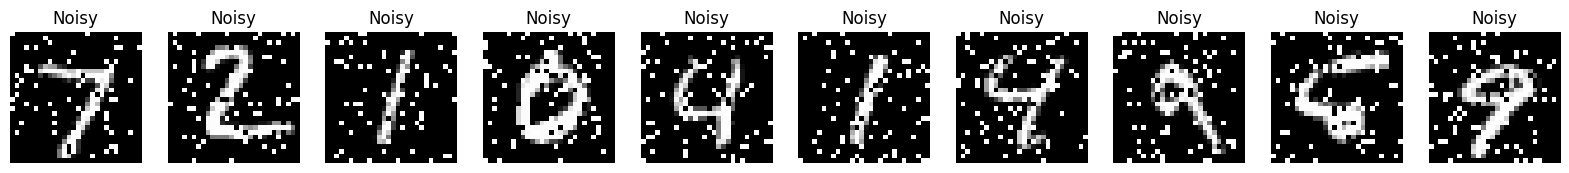

In [9]:
# Display some noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

In [10]:
# Build the autoencoder
input_img = tf.keras.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [12]:
# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train, epochs=1, batch_size=128, validation_split=0.2)

375/375 [==============================] - 170s 453ms/step - loss: 0.0859 - val_loss: 0.0856


In [13]:
# Denoise the test images
denoised_images = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 12s 36ms/step


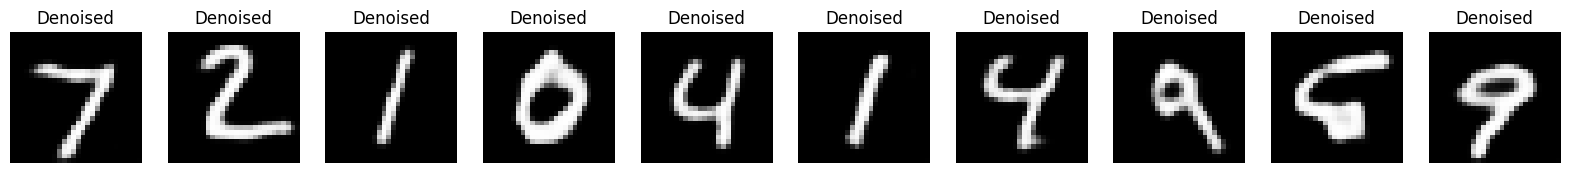

In [14]:
# Display some denoised images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")
plt.show()